In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [53]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [33]:
data.head(4)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### EDA

In [34]:
# Lets check the shape first
data.shape

(32560, 15)

There are 32560 rows and 15 columns in the dataset

In [35]:
#Lets now check all the columns and the dtype of each column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There are 32560 entries for each and some has int64 datatype while some has object datatype.

In [36]:
#Lets check for the total number of null values and fill those with best methods

data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

with the above information we see there are no null values in the entire dataset hence we don't need to fill anything.

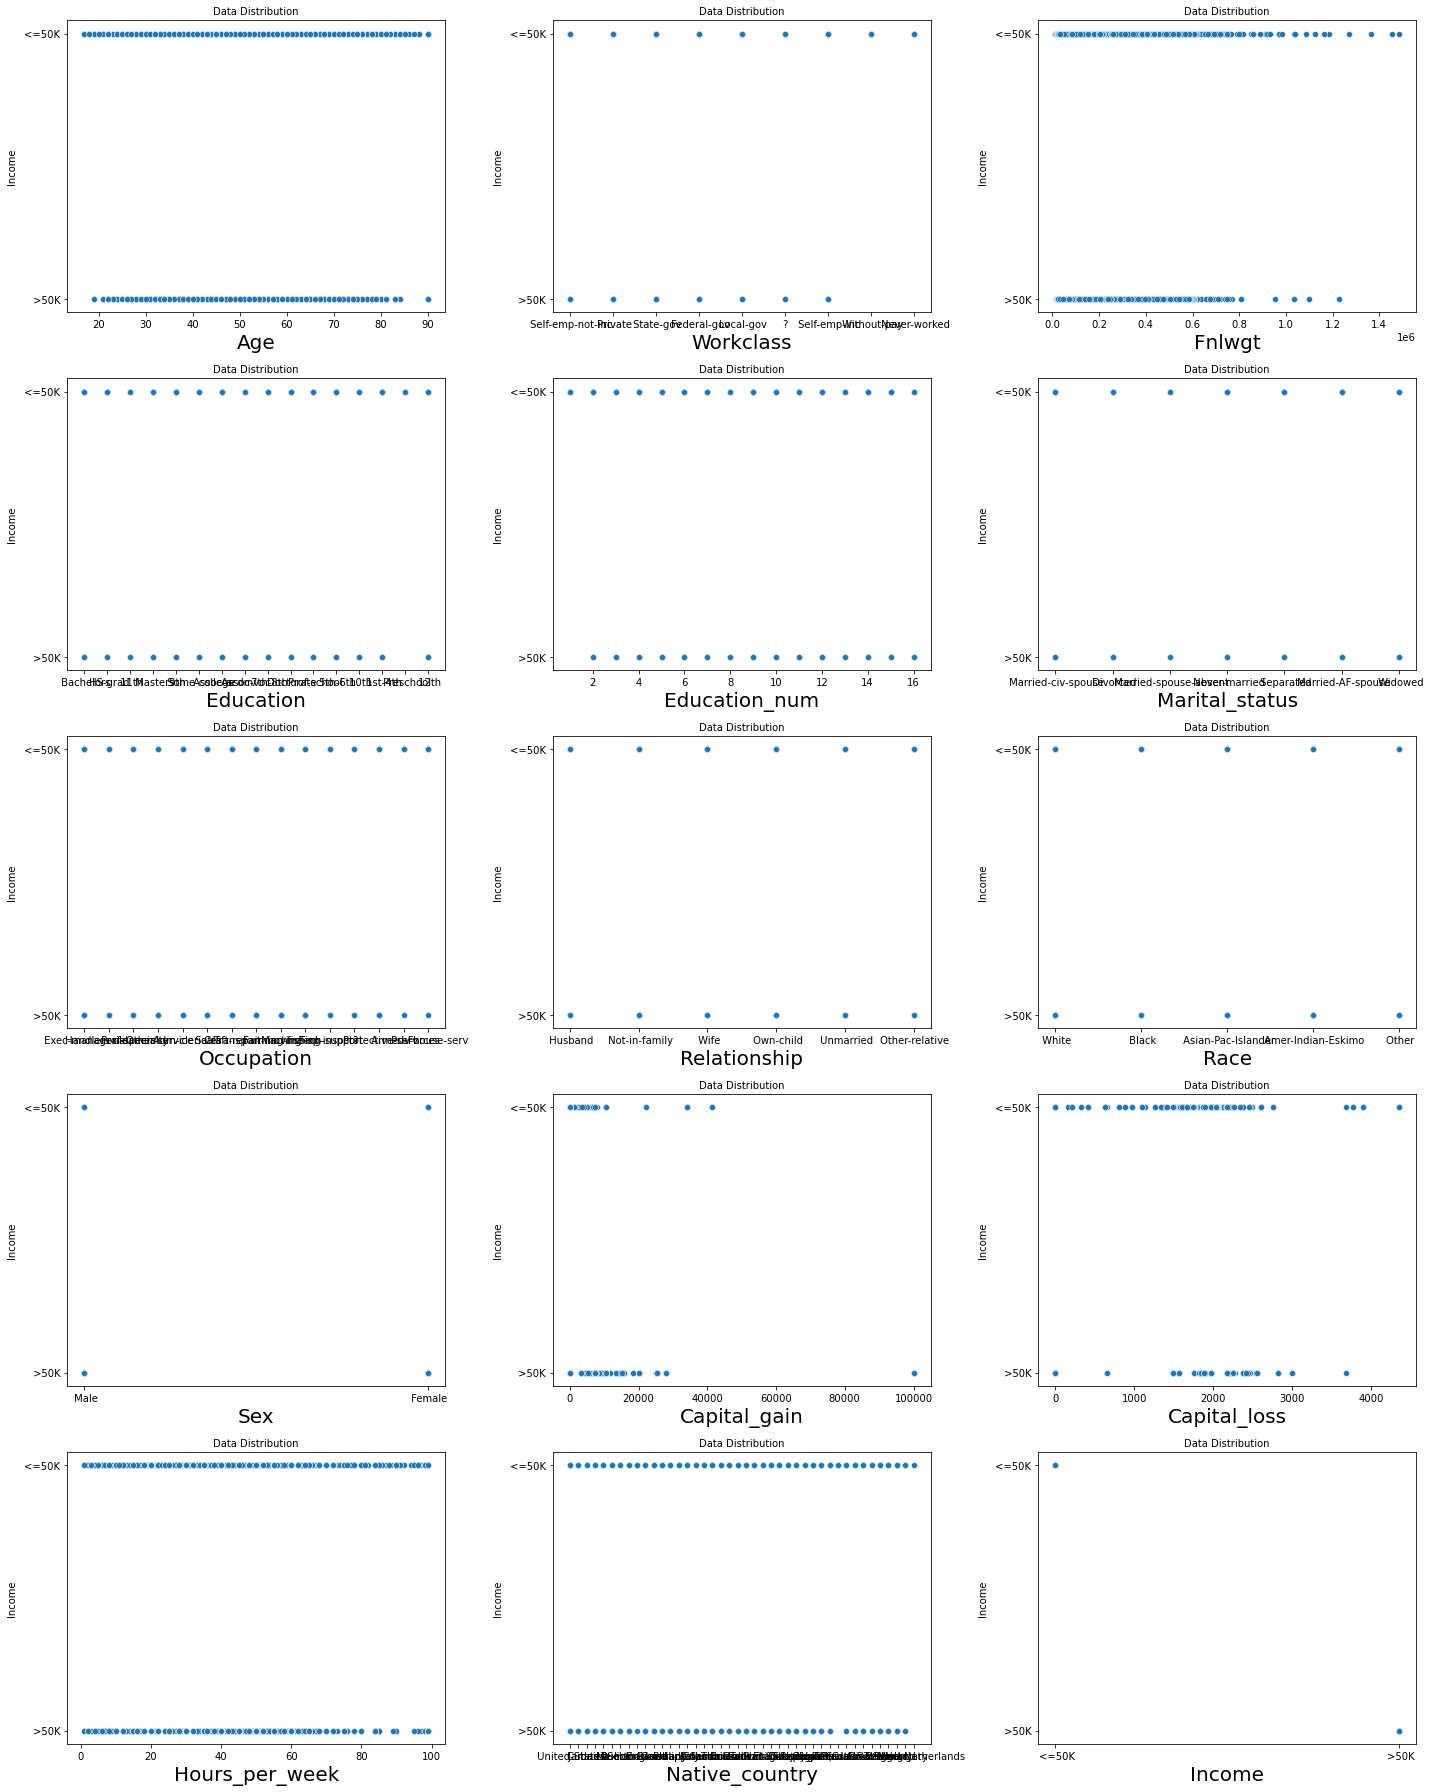

In [37]:
#Lets now plot scatter plot for each column in x with respect to y to understand the data.

plt.figure(figsize = [20,25])
plotnumber = 1

for column in data:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.scatterplot(x = data[column], y=data['Income'] )
        plt.xlabel(column, fontsize = 20)
        plt.title("Data Distribution", fontsize = 10)
    plotnumber += 1
plt.tight_layout()

with the above plot lets find out what we observed.

1 -from the age plot =  we see that there are less number of employees getting income more than 50k between the age group 80-90                         otherwise it is equal.

2 - From the fnwlgt plot =  Person having it between 0.75 and 1.50 have less chances of income of more than 50k

3 - From the capital gain plot it looks like that who have more captipal gain have chances of income of more than 50k.

4 - From Capital loss Plot = It looks like that people having less capital loss are having higher chances of income of more than 50k.

5 - From Workclass plot = Those who never worked and without pay never had income of more than 50k.

In [38]:
#lets see the Standard Deviation, Min Value, 25 % , 75% and maximum value of the colums

data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


We see the mean, standard deviation and 1st, 2nd and 3rd quartile with it.

In [54]:
#Lets first convert the string values in int for further processing of data with the help of label encoder.

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

for i in data.columns:
    if data[i].dtypes=="object":
        data[i] = LE.fit_transform(data[i].values.reshape(-1,1))

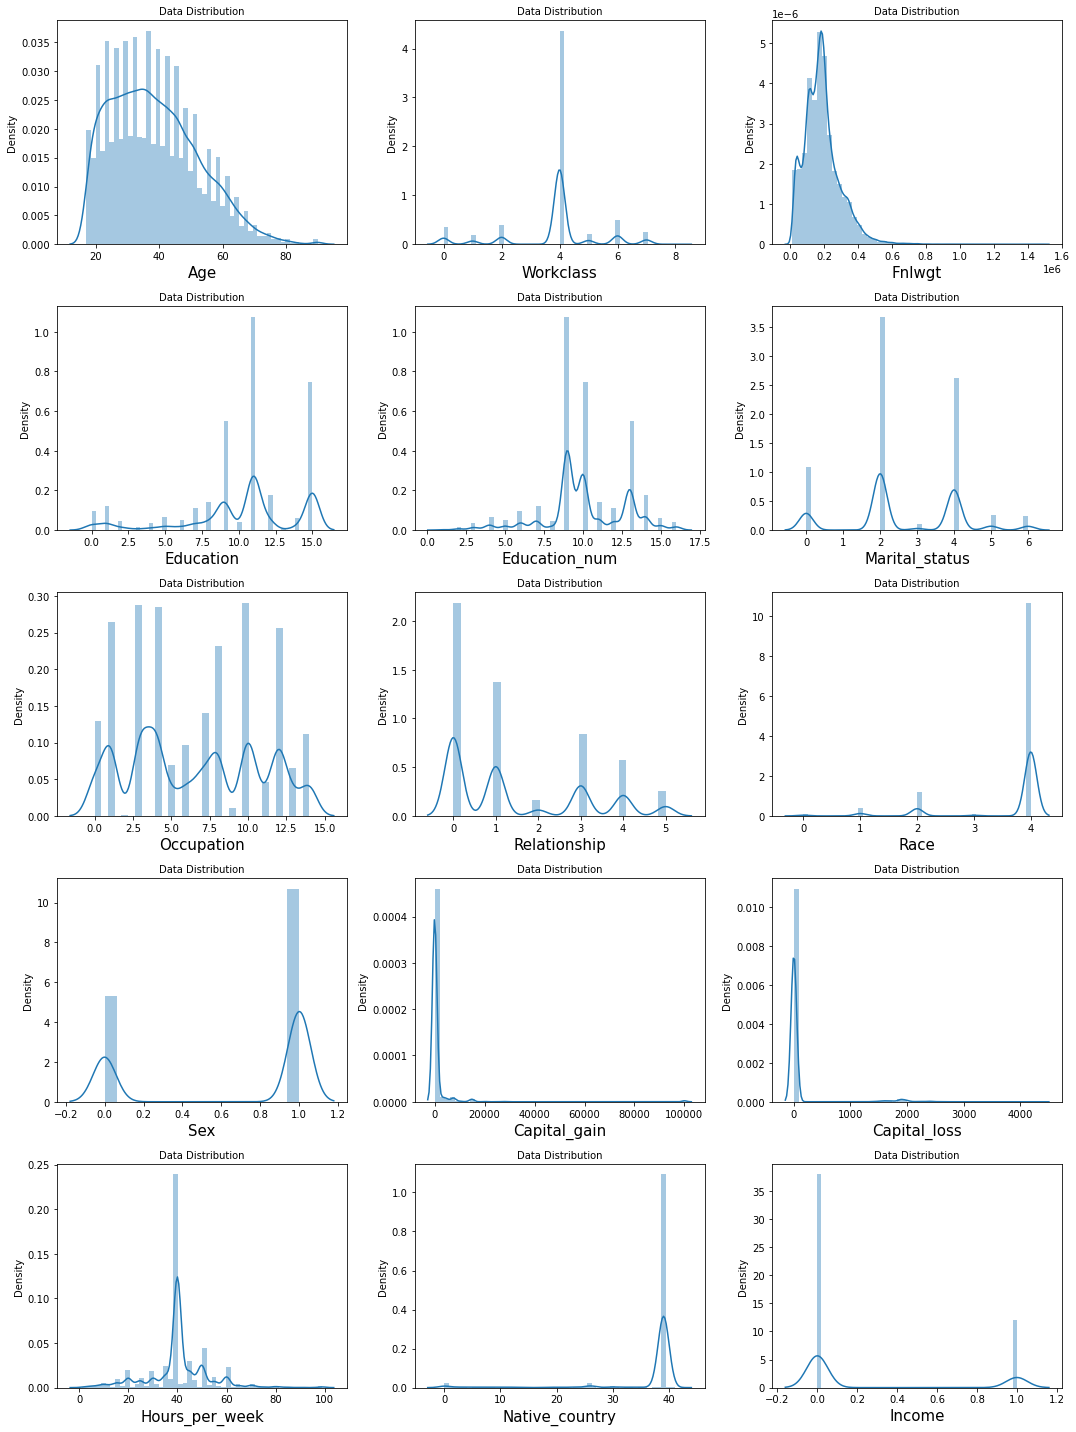

In [55]:
#Checking skewness in the data with the help of distplot

plt.figure(figsize = [15,20])
plotnumber = 1

for column in data:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(data[column],)
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 10)
    plotnumber += 1
plt.tight_layout()

In [14]:
data.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

**This shows that there is a lot of skewness in the columns**
1-Fnlwgt
2-Captial_gain
3-Capital_loss
Others also have but are categorical data

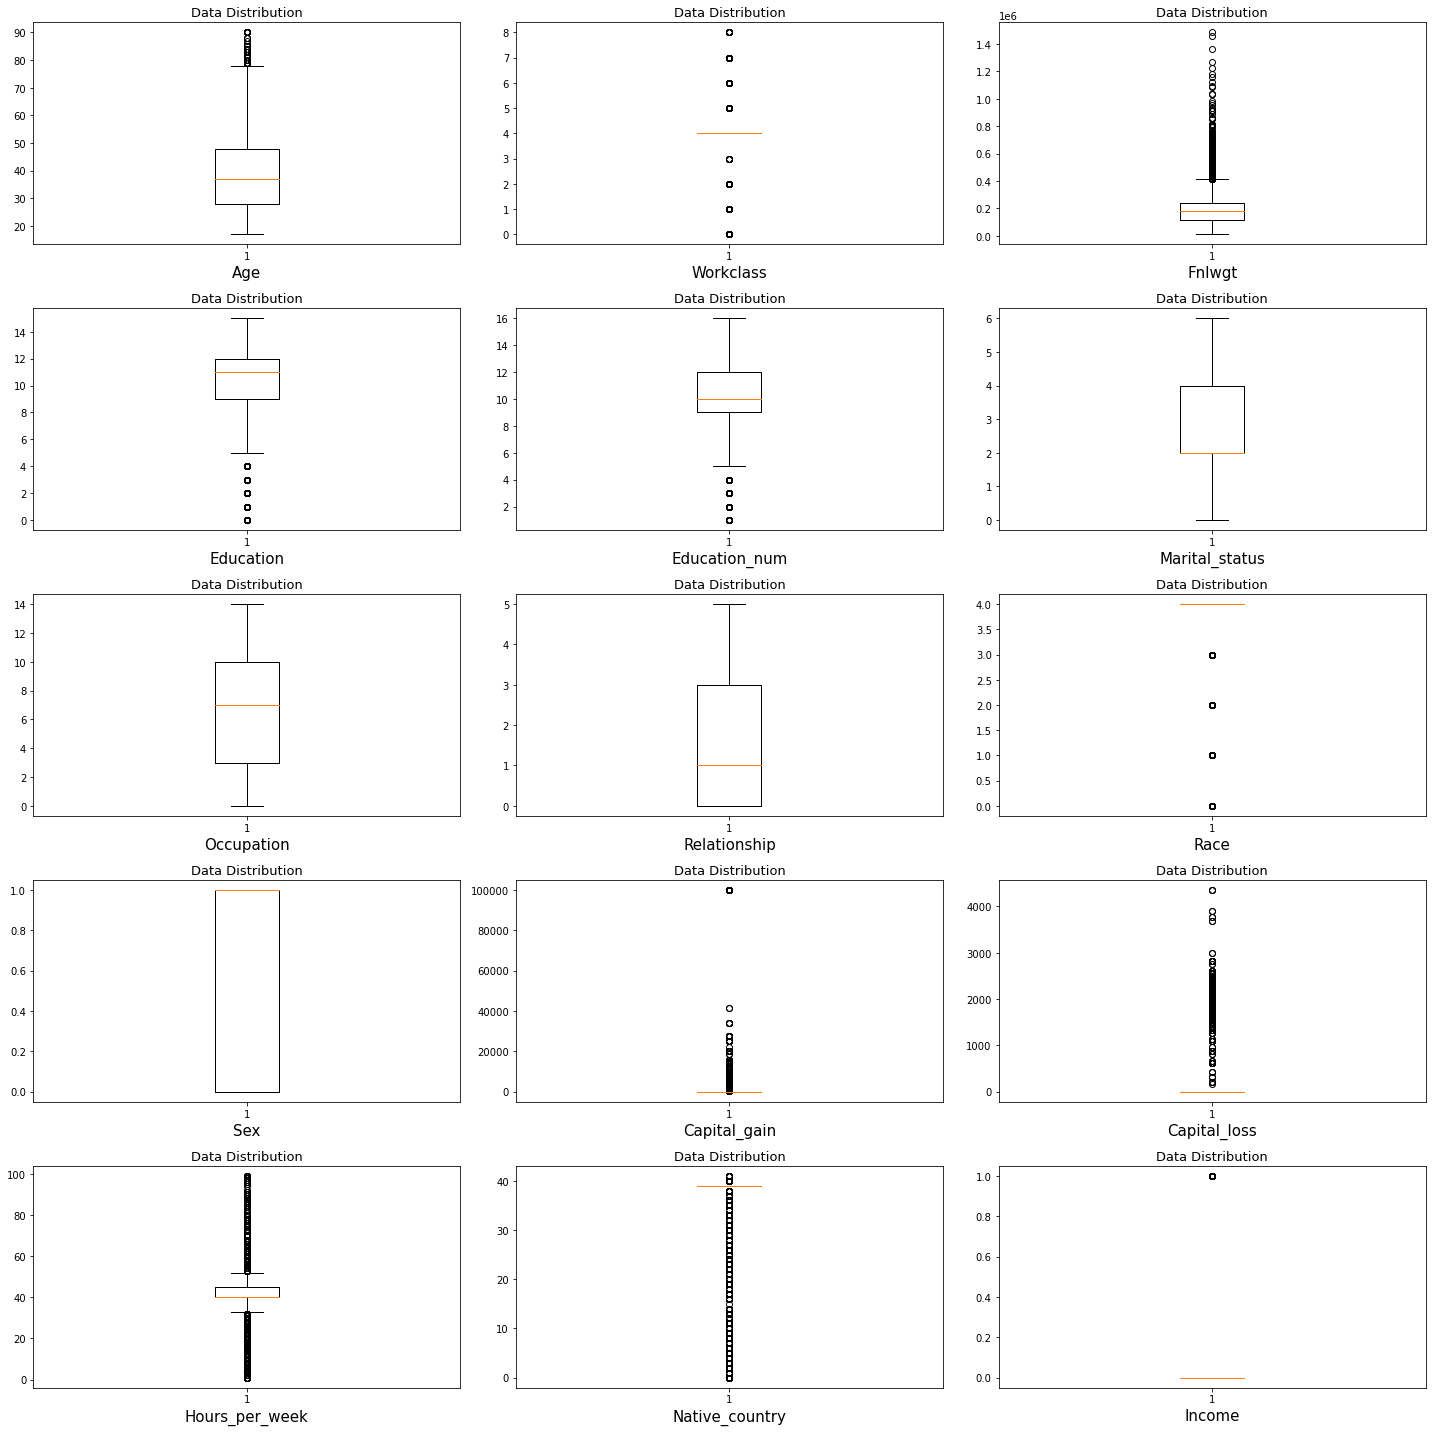

In [15]:
#Checking for outliers

plt.figure(figsize = [20,20])
plotnumber = 1

for column in data:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        plt.boxplot(data[column])
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 13)
    plotnumber += 1
plt.tight_layout()

With above observation outliers are found in the columns 
1 - Age
2 - WorkClass
3 - Fnlwgt
3 - Education
4 - Education Number
5 - Captial Gain
6 - Capital Loss
7 - Hours Per Week

In [16]:
#Now will check the collinearity among features
corr_mat = data.corr()
corr_mat

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


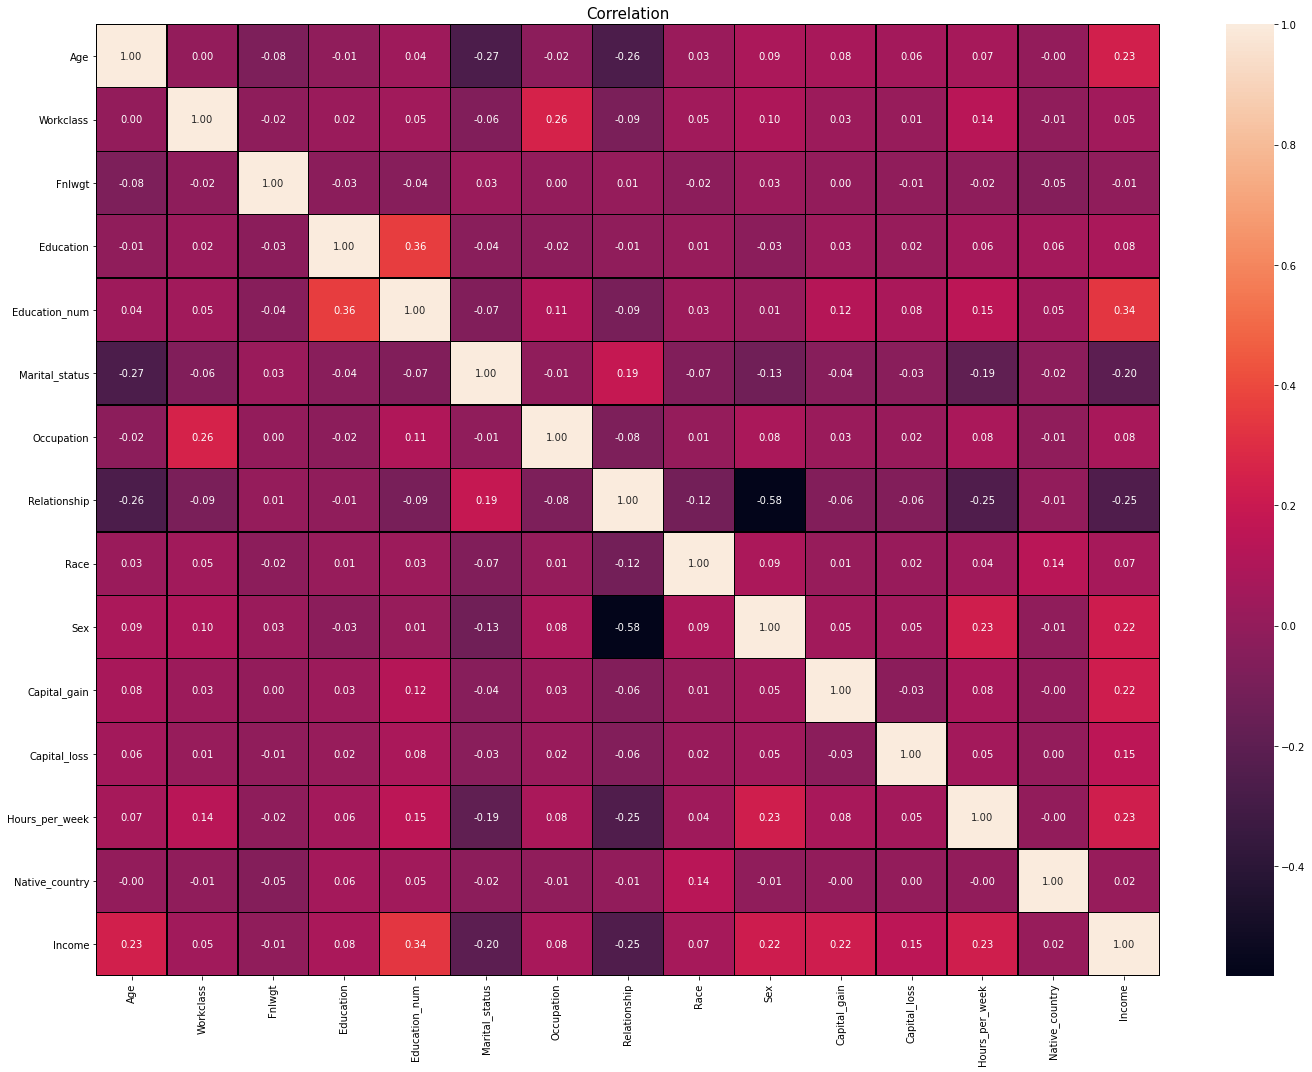

In [17]:
plt.figure(figsize = [20,15])
sns.heatmap(corr_mat,annot=True, linewidths=0.3,linecolor="black",fmt='.2f')
plt.title('Correlation', fontsize=15)
plt.tight_layout()

#### Observation from the above plot.

Max Correlation of the output with the features columns is with Education number(34%).

Min Correlation of the output with the features columns is with Fnlwgt(-1%).

Also we can see that there are not much corelation among the features.

### Data Cleaning :

**Removing Outliers**

In [96]:
### Now Will remove outliers with the help of Z-score Method.

from scipy import stats

z = np.abs(stats.zscore(data))
print(z)
print('\n Row Numbers ==>', np.where(z>3)[0])
print('\n Column Numbers ==>', np.where(z>3)[1])

[[0.83709708 1.46388339 1.0087417  ... 2.22212013 0.29157343 0.5632099 ]
 [0.04264043 0.09012148 0.24504633 ... 0.03542999 0.29157343 0.5632099 ]
 [1.05703146 0.09012148 0.42576955 ... 0.03542999 0.29157343 0.5632099 ]
 ...
 [1.42358875 0.09012148 0.3588108  ... 0.03542999 0.29157343 0.5632099 ]
 [1.21562378 0.09012148 0.11092744 ... 1.65520046 0.29157343 0.5632099 ]
 [0.98372    0.77700244 0.92986178 ... 0.03542999 0.29157343 1.77553698]]

 Row Numbers ==> [    3     9    10 ... 32532 32550 32552]

 Column Numbers ==> [13 12  8 ...  8  8  8]


In [97]:
##Storing the zcore > 3 in index

index = np.where(z>3)[0]

#Deleting the indexes having outliers stored in the above variable

New_df = data.drop(data.index[index])

**Removing Skewness**

In [98]:
q = New_df['Fnlwgt'].quantile(0.99)
New_df = New_df[New_df['Fnlwgt']<q]

q = New_df['Capital_gain'].quantile(0.99)
New_df = New_df[New_df['Capital_gain']<q]

In [100]:
#Separating label and features

x = New_df.drop(['Income'], axis = 1)
y = New_df['Income']

### Model Building:

In [23]:
#Data is now cleaned, skewness and outliers removed. We will now build the model.

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
#Scaling the data

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [40]:
#Splitting the data into train and test

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state = 1000, stratify  = y)

In [103]:
#Model Building

In [104]:
## Lets see which model will give the best output

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

In [106]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()
svc = SVC()

In [107]:
#training with the all of them

lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)
svc.fit(x_train,y_train)

print("All Models Trained")

All Models Trained


In [108]:
lr.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
kn.score(x_test,y_test)
svc.score(x_test,y_test)

print("All scores Captured")

All scores Captured


In [109]:
#Lets check the roc_auc_score
#for Logistic Regression
roc_auc_score(y_test,lr.predict(x_test))

0.6651358050191056

In [110]:
#for Decision Tree
roc_auc_score(y_test,dt.predict(x_test))

0.7279221315707942

In [111]:
#for Random Forest
roc_auc_score(y_test,rf.predict(x_test))

0.7433801507797171

In [112]:
#for KNeighborsClassifier
roc_auc_score(y_test,kn.predict(x_test))

0.739219250232366

In [113]:
#For support vectore classifier
roc_auc_score(y_test,svc.predict(x_test))

0.7162449654032842

In [114]:
#Now plotting roc_auc_curve for all the columns

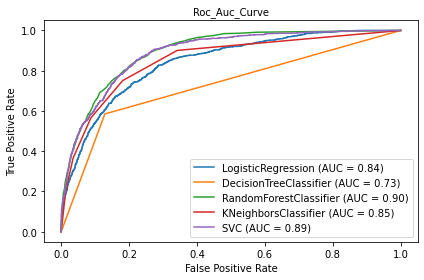

In [115]:
curve = plot_roc_curve(lr,x_test,y_test)

plot_roc_curve(dt,x_test,y_test,ax=curve.ax_)

plot_roc_curve(rf,x_test,y_test,ax=curve.ax_)

plot_roc_curve(kn,x_test,y_test,ax=curve.ax_)

plot_roc_curve(svc,x_test,y_test,ax=curve.ax_)

plt.title('Roc_Auc_Curve', fontsize = 10)
plt.tight_layout()

With above plotting we can see area covered by Random Forest Model is the most hence he will chose it further.

**Getting all the other scores for RandomForest**

In [116]:
rf = RandomForestClassifier(criterion='entropy',n_estimators=100, random_state=40)

In [117]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=40)

In [118]:
y_pred = rf.predict(x_test)

In [119]:
# For Accuracy Score

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8460820895522388

In [120]:
#For Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[3891,  319],
       [ 506,  644]], dtype=int64)

In [121]:
#AUC SCORE
roc_auc_score(y_test,y_pred)

0.7421140142517815

In [122]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4210
           1       0.67      0.56      0.61      1150

    accuracy                           0.85      5360
   macro avg       0.78      0.74      0.76      5360
weighted avg       0.84      0.85      0.84      5360



**Cross Validation**

In [123]:
#Doing Cross Validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(rf,x,y,cv=5)

cvs.mean()

0.8511347071323732

Since the accuracy score and cross validation score are almost same we can say that the model is neither overfitting or underfitting

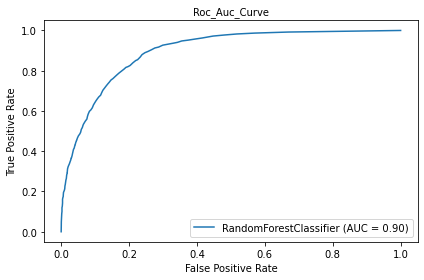

In [124]:
#Plotting ROC_AUC Curve for the model
plot_roc_curve(rf,x_test,y_test)
plt.title('Roc_Auc_Curve', fontsize = 10)
plt.tight_layout()

### HyperParameter Tuning:

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
params = {'n_estimators':[100,120,150],
         'criterion':['gini','entropy'],
         'max_depth':[18,21,23],
         'min_samples_leaf': [3,4,2],
         'min_samples_split': [8,11,13]}

In [127]:
grid = GridSearchCV(rf, param_grid= params,cv = 3, n_jobs=-1)

In [128]:
grid.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=40),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [18, 21, 23],
                         'min_samples_leaf': [3, 4, 2],
                         'min_samples_split': [8, 11, 13],
                         'n_estimators': [100, 120, 150]})

In [129]:
print('Best Estimators == > \n', grid.best_params_)

Best Estimators == > 
 {'criterion': 'entropy', 'max_depth': 23, 'min_samples_leaf': 2, 'min_samples_split': 11, 'n_estimators': 150}


In [130]:
#Reinstantiating classifier with the best parameters

clf = grid.best_estimator_

In [131]:
clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=23, min_samples_leaf=2,
                       min_samples_split=11, n_estimators=150, random_state=40)

In [132]:
y_pred =  clf.predict(x_test)

In [133]:
# For Accuracy Score

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.860634328358209

In [134]:
#For Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[3964,  246],
       [ 501,  649]], dtype=int64)

In [135]:
#AUC SCORE
roc_auc_score(y_test,y_pred)

0.752957761024476

In [136]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4210
           1       0.73      0.56      0.63      1150

    accuracy                           0.86      5360
   macro avg       0.81      0.75      0.77      5360
weighted avg       0.85      0.86      0.85      5360



In [137]:
##Cross Validating.

cvs = cross_val_score(clf,x,y,cv=5)

cvs.mean()

0.8593448251372362

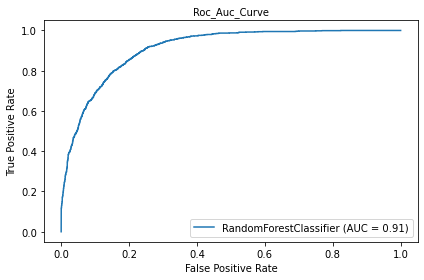

In [138]:
#Plotting ROC_AUC Curve for the model
plot_roc_curve(clf,x_test,y_test)
plt.title('Roc_Auc_Curve', fontsize = 10)
plt.tight_layout()

### Model Saving :

In [92]:
#Saving the model

import joblib

filename = 'Census Income.sav'
joblib.dump(clf, filename)

['Census Income.sav']